# Project: Investigate a Dataset (MOVIES!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### In this project we will investigate a dataset about movies, it's a dataset containing thousands of movies
### and all the informations belonging to them and we are going to get many interesting informations about those movies
#### I plan on exploring the culture of the movies and their best years and genres

### Importing all dictionaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:#585e61"> </span>
<span style="color:#7f97a1"> </span>

### making a function

In [2]:
def check(i):
    print(i.info())
    print(i.describe())

### <span style="color:#585e61">converting the csv to a dataset with a variable named movies</span>
##### <span style="color:#7f97a1">This sets the csv file to a dataframe named "movies"</span>

In [3]:
movies = pd.read_csv("tmdb-movies.csv")

<a id='wrangling'></a>
# Data Wrangling

### In this section we are going to view data, clean it and perform some operations to be able to explore it easly

### Getting the first five rows of the dataframe

In [4]:
# head
print(movies.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

### insights:
##### There are many useless rows that we should remove such as "id" and "homepage"

### Getting some info about the dataframe

In [5]:
movies.info() # This gives us info about the data like the type of the data in the columns and the number of empty values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### insights:
##### There are many null (empty) values in this dataframe as we can see so we must clean it

### Getting the most basic informations about the dataframe

In [6]:
print(movies.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

### insights:
##### We can see that hte avarage runtime of a movie is 102 mins which is short less than 2 hours
##### We can also see that the first movies to be released was released in 1960

### <span style="color:#585e61">Dropping columns</span>
##### <span style="color:#7f97a1">I removed all columns that I think is useless like the ID, those columns are unusable and they won't benefit me</span>

In [7]:
movies.drop(["id","imdb_id" ,"homepage","budget","revenue","release_date","overview","keywords","tagline"], axis = 1, inplace = True)

### <span style="color:#b59686">Checking</span>

In [8]:
print(check(movies))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB
None
         popularity       runtime    vote_count  vote_average  release_year  \
count  10866.000000  10866.0

### filling nan (not a number) values with the word unknown
##### instead of having null values in our data I prefer replacing it with a word like "unknown"

In [9]:
movies["genres"] = movies["genres"].fillna("unknown")
movies["director"] = movies["director"].fillna("unknown")
movies["cast"] = movies["cast"].fillna("unknown")

### Checking if there was duplicates

In [10]:
movies.duplicated().sum()

1

### Removing duplicates

In [11]:
movies = movies.drop_duplicates()

### <span style="color:#f2f4f5">Dropping some rows</span>
##### I removed all the movies that has no production company cuz I think if they didn't enter it then the data is mostly faked or has many wrong values

In [12]:
movies = movies.dropna()

### checking

In [13]:
print(check(movies))

<class 'pandas.core.frame.DataFrame'>
Index: 9835 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9835 non-null   float64
 1   original_title        9835 non-null   object 
 2   cast                  9835 non-null   object 
 3   director              9835 non-null   object 
 4   runtime               9835 non-null   int64  
 5   genres                9835 non-null   object 
 6   production_companies  9835 non-null   object 
 7   vote_count            9835 non-null   int64  
 8   vote_average          9835 non-null   float64
 9   release_year          9835 non-null   int64  
 10  budget_adj            9835 non-null   float64
 11  revenue_adj           9835 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 998.9+ KB
None
        popularity      runtime   vote_count  vote_average  release_year  \
count  9835.000000  9835.000000  9835.

##### As we can see there is no null values

In [ ]:
movies.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9835.000000,9835.000000,9835.000000,9835.000000,9835.000000,9.835000e+03,9.835000e+03
mean,0.691570,102.677173,237.975699,5.968033,2000.905643,1.929442e+07,5.668876e+07
std,1.034423,28.222182,601.311033,0.915290,13.033929,3.558432e+07,1.510322e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.230733,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.417035,100.000000,45.000000,6.000000,2005.000000,1.842182e+05,0.000000e+00
75%,0.773261,112.000000,172.000000,6.600000,2011.000000,2.431644e+07,4.238564e+07
max,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


### Adding columns
##### I seperated the genre column to multiple columns so I can easily visualize columns

In [15]:
split_columns = movies['genres'].str.split('|', expand=True) # This splits the columns by the pipe character like the comma sepreated values aka csv
max_columns = split_columns.shape[1] # This gets the number of the columns

split_columns.columns = [f'genre_{i+1}' for i in range(max_columns)] # This names the new columns "column" + a number and so on

movies = pd.concat([movies, split_columns], axis=1) # This add the new columns to the main dataframe

movies.drop('genres', axis=1, inplace=True) # This removes the old gener column

print(movies.head())

   popularity                original_title  \
0   32.985763                Jurassic World   
1   28.419936            Mad Max: Fury Road   
2   13.112507                     Insurgent   
3   11.173104  Star Wars: The Force Awakens   
4    9.335014                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                               production_companies  vote_count  \
0      124  Universal Studios|Amblin Entertainment|Legenda...        5562   
1      120  Village Roadshow Pictures|Kennedy Miller Produ...        6185   
2      119  Summit Entertainment|Mandevil

### Filling null values with "-"

In [16]:
movies = movies.fillna("-") # This fills the null values with "-" as we have done in the unknown one

### Checking

In [17]:
print(check(movies))

<class 'pandas.core.frame.DataFrame'>
Index: 9835 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9835 non-null   float64
 1   original_title        9835 non-null   object 
 2   cast                  9835 non-null   object 
 3   director              9835 non-null   object 
 4   runtime               9835 non-null   int64  
 5   production_companies  9835 non-null   object 
 6   vote_count            9835 non-null   int64  
 7   vote_average          9835 non-null   float64
 8   release_year          9835 non-null   int64  
 9   budget_adj            9835 non-null   float64
 10  revenue_adj           9835 non-null   float64
 11  genre_1               9835 non-null   object 
 12  genre_2               9835 non-null   object 
 13  genre_3               9835 non-null   object 
 14  genre_4               9835 non-null   object 
 15  genre_5               983

### making a new dataframe having all the genres seperated

In [18]:
genres = movies[["genre_1","genre_2","genre_3","genre_4","genre_5"]]

### Checking

In [19]:
print(genres.isna().max()) # This checks if there was null valuees in the columns

genre_1    False
genre_2    False
genre_3    False
genre_4    False
genre_5    False
dtype: bool


<a id='eda'></a>
# Exploratory Data Analysis

## Research Question 1 (When was short form movies popular?)

### In this visual we will see the runtime of the movies across different years

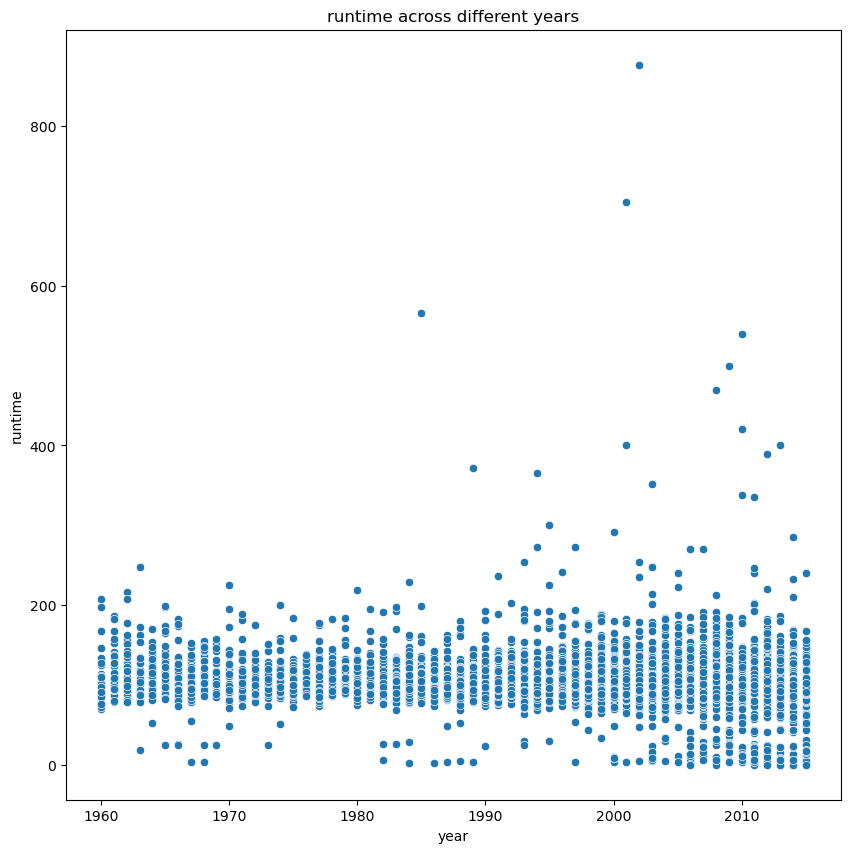

In [20]:
# visualization
t = movies["release_year"]
s = movies["runtime"]
plt.figure(figsize=(10, 10)) # Set the figure size for better readability
sns.scatterplot( x=t, y=s ) # This makes the scattered plot
plt.title('runtime across different years') # Set the title of the plot
plt.xlabel('year') # Set the label for the x-axis
plt.ylabel('runtime') # Set the label for the y-axis
plt.show()

### insights:
##### We can see that there is a coreletion between the time when the movies were released and there runtime, after the year 2000
##### movies with less runtime were more popular while movies that had a runtime higher than 300 hrs also spread but they weren't popular

## Research Question 2 (What were the best years for the movies?)

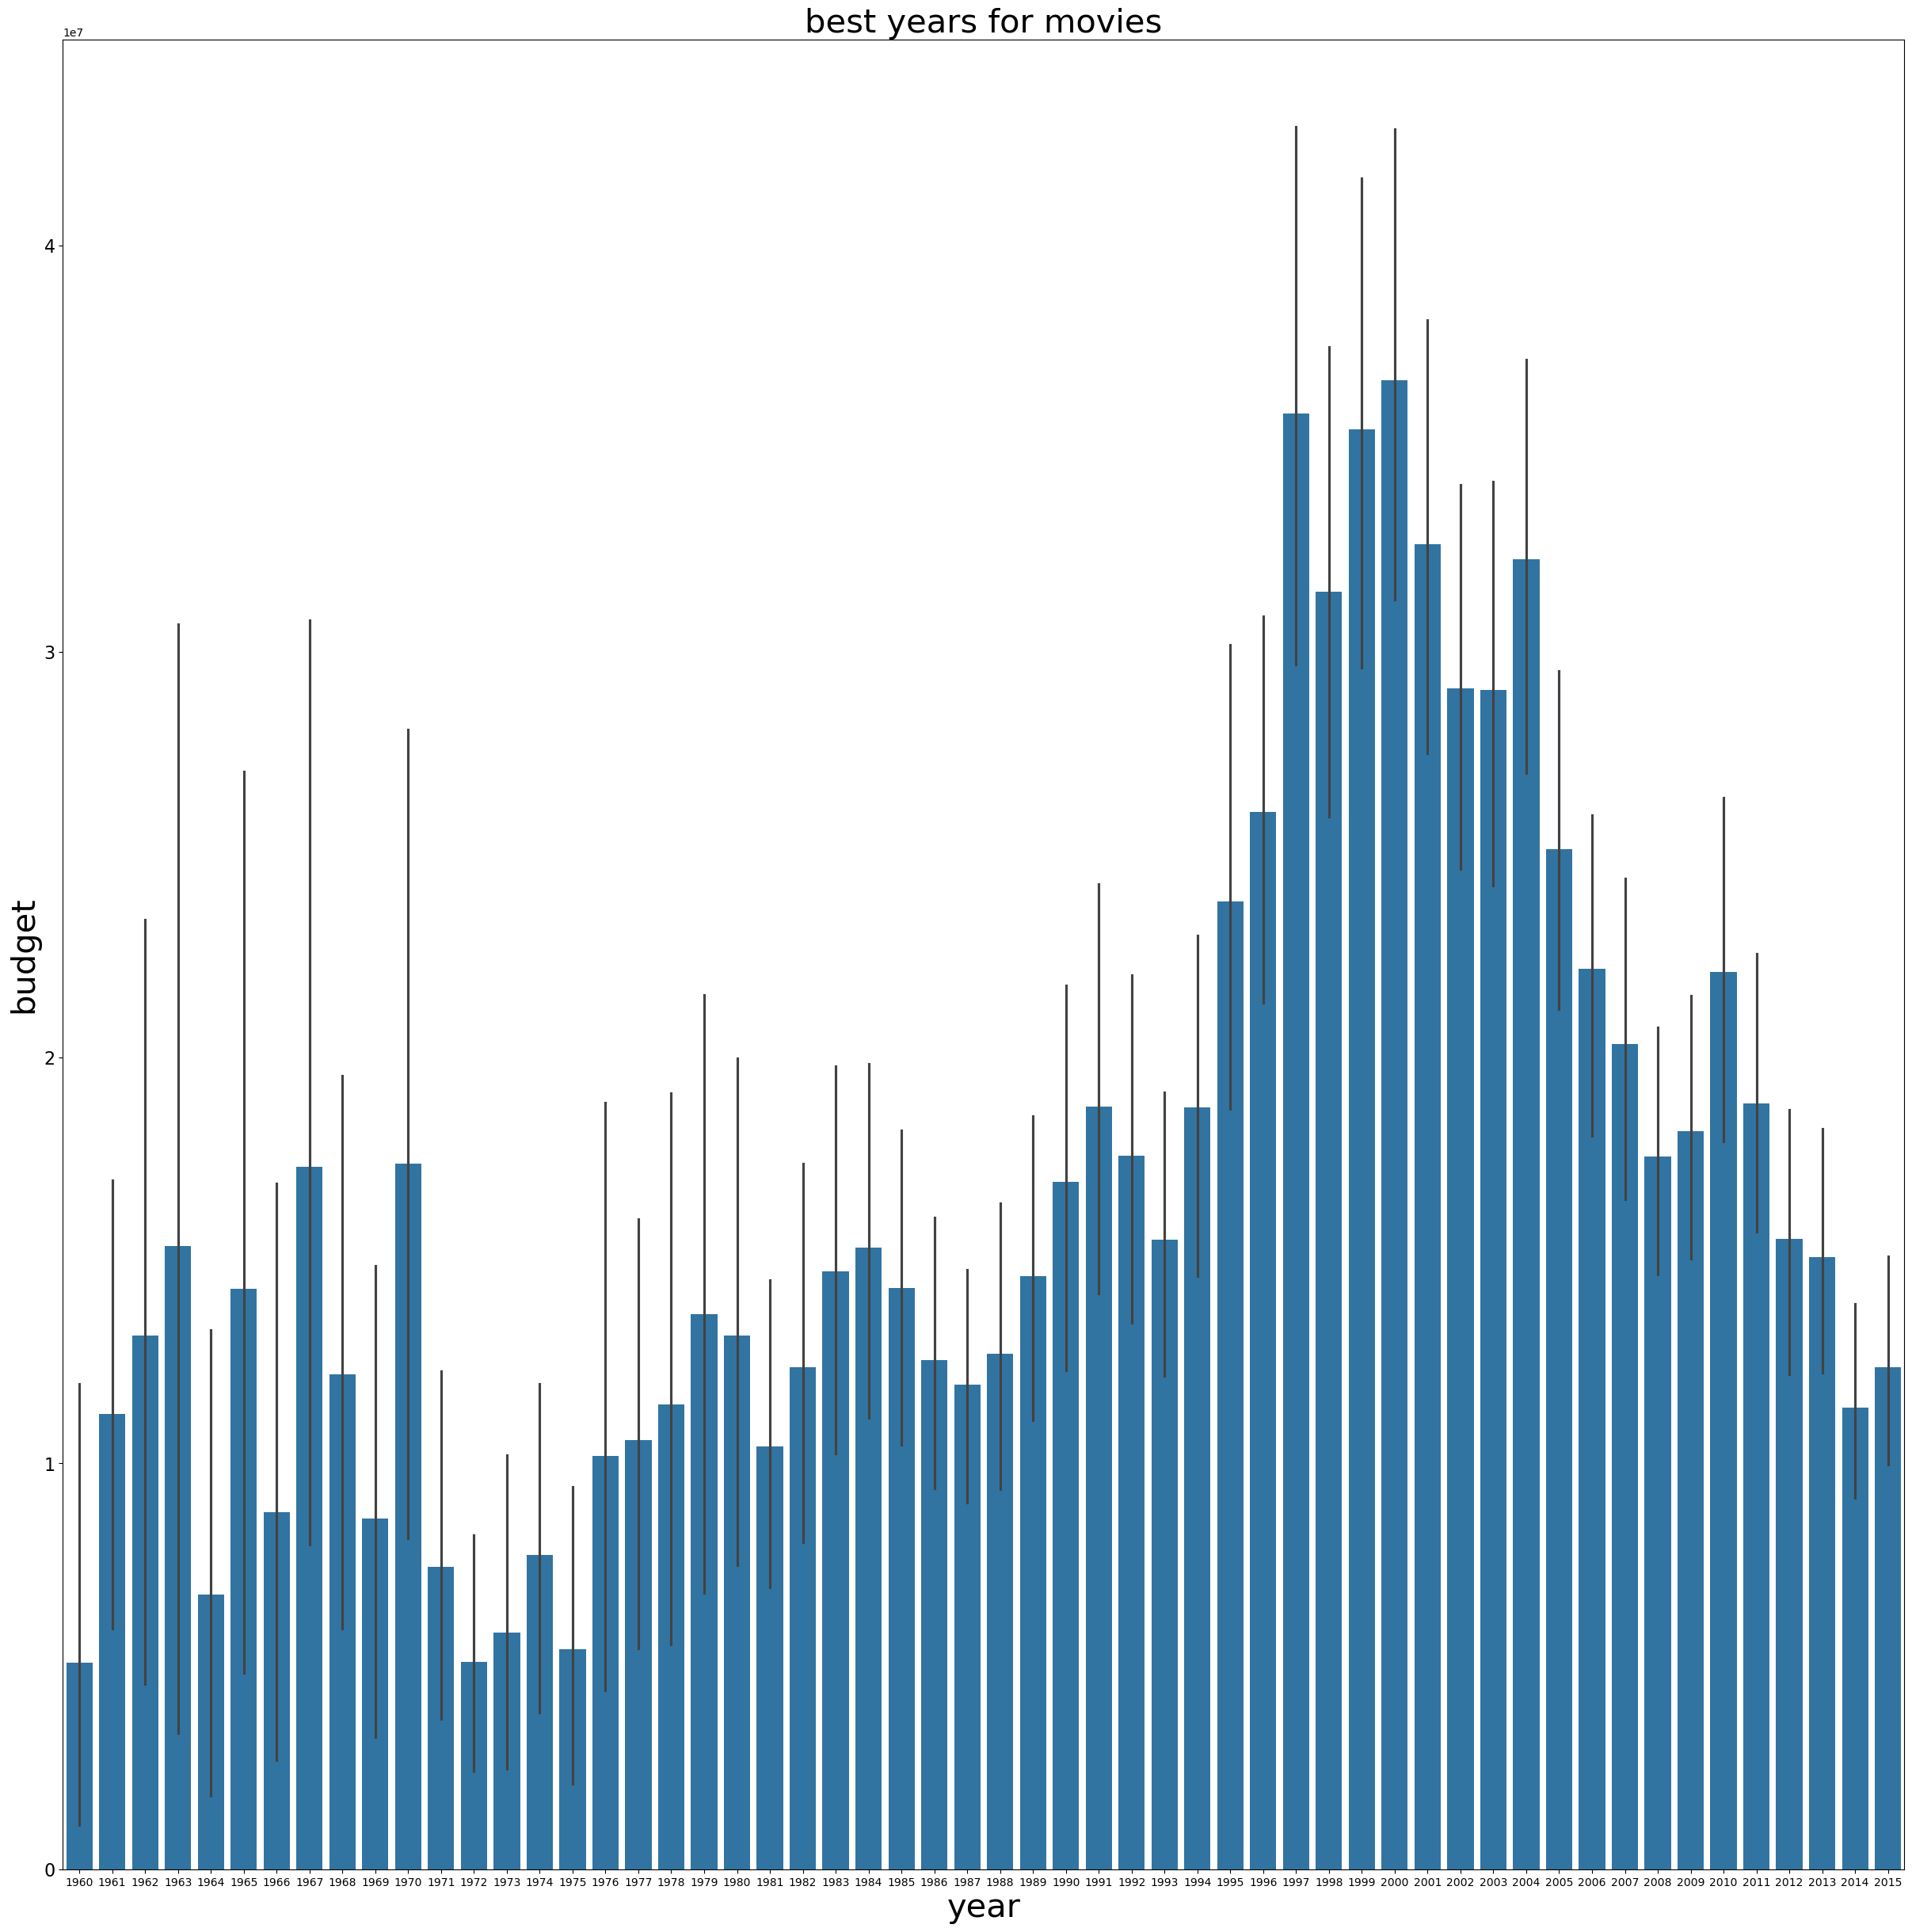

In [21]:
t = movies["release_year"]
s = movies["budget_adj"]

plt.figure(figsize=(30, 30)) # Set the figure size for better readability
sns.barplot( x = t, y = s) # This makes the bar plot
plt.title('best years for movies',fontsize=30) # Set the title of the plot
plt.xlabel('year',fontsize=30) # Set the label for the x-axis
plt.ylabel('budget',fontsize=30) # Set the label for the y-axis
plt.yticks(fontsize=16) # increases the font size of the values on the y axis
plt.show()

### insights:
##### As we can see the best era for movies was from 1995 to 2007 as there budgets were the highest

## Research Question 3 (does runtime affect popularity?)

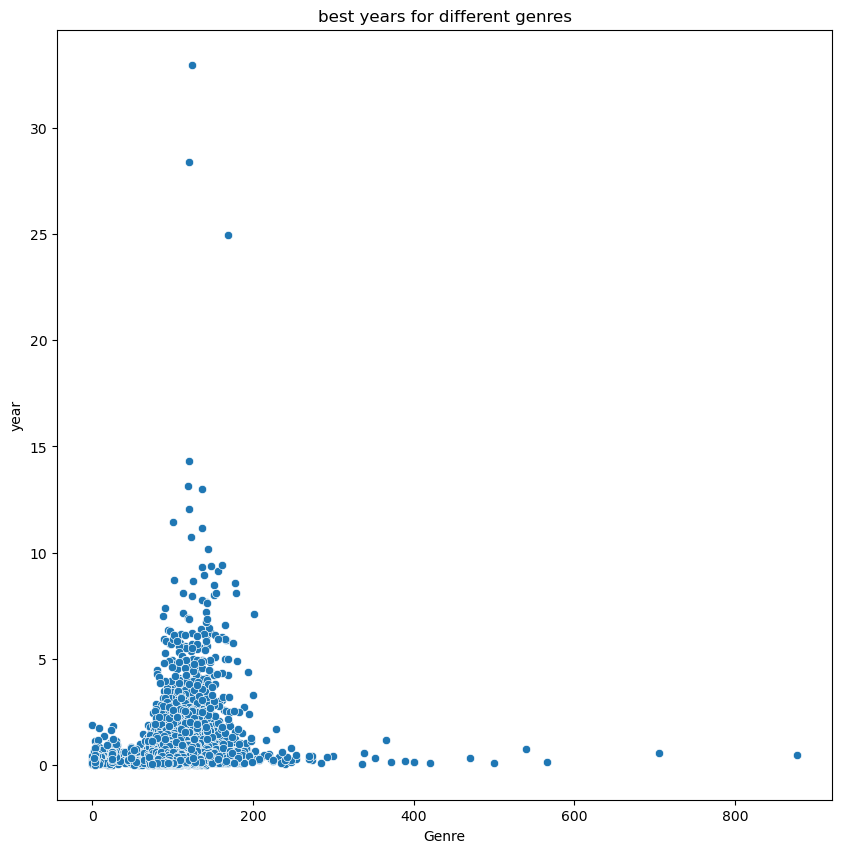

In [22]:
# visualization
t = movies["runtime"]
s = movies["popularity"]
plt.figure(figsize=(10, 10)) # Set the figure size for better readability
sns.scatterplot( x=t, y=s ) # This makes the scattered plot
plt.title('best years for different genres') # Set the title of the plot
plt.xlabel('Genre') # Set the label for the x-axis
plt.ylabel('year') # Set the label for the y-axis
plt.show()

### insights:
##### As we can see there is no popular long movie as I expected alll of the popular movies are less than 200 mins and the most popular ones are around 180 mins
##### while all movies that has a runtime more than 200 mins aren't popular so runtime does affect the popularity

## Research Question 4 (What is the best genre?)

### Making sure there are no mis entries

In [23]:
unique_values = pd.unique(genres.values.ravel('K')) # This givs us the unique values in the genres dataset
print(unique_values)

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Mystery' 'Thriller' 'Fantasy' 'History'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie' 'unknown' 'Foreign'
 '-']


### Collecting all the data of genres in one column

In [24]:
melted_genres = genres.melt(value_name='all_genres') # melt method is used to Collect all the ddata of genres in one column

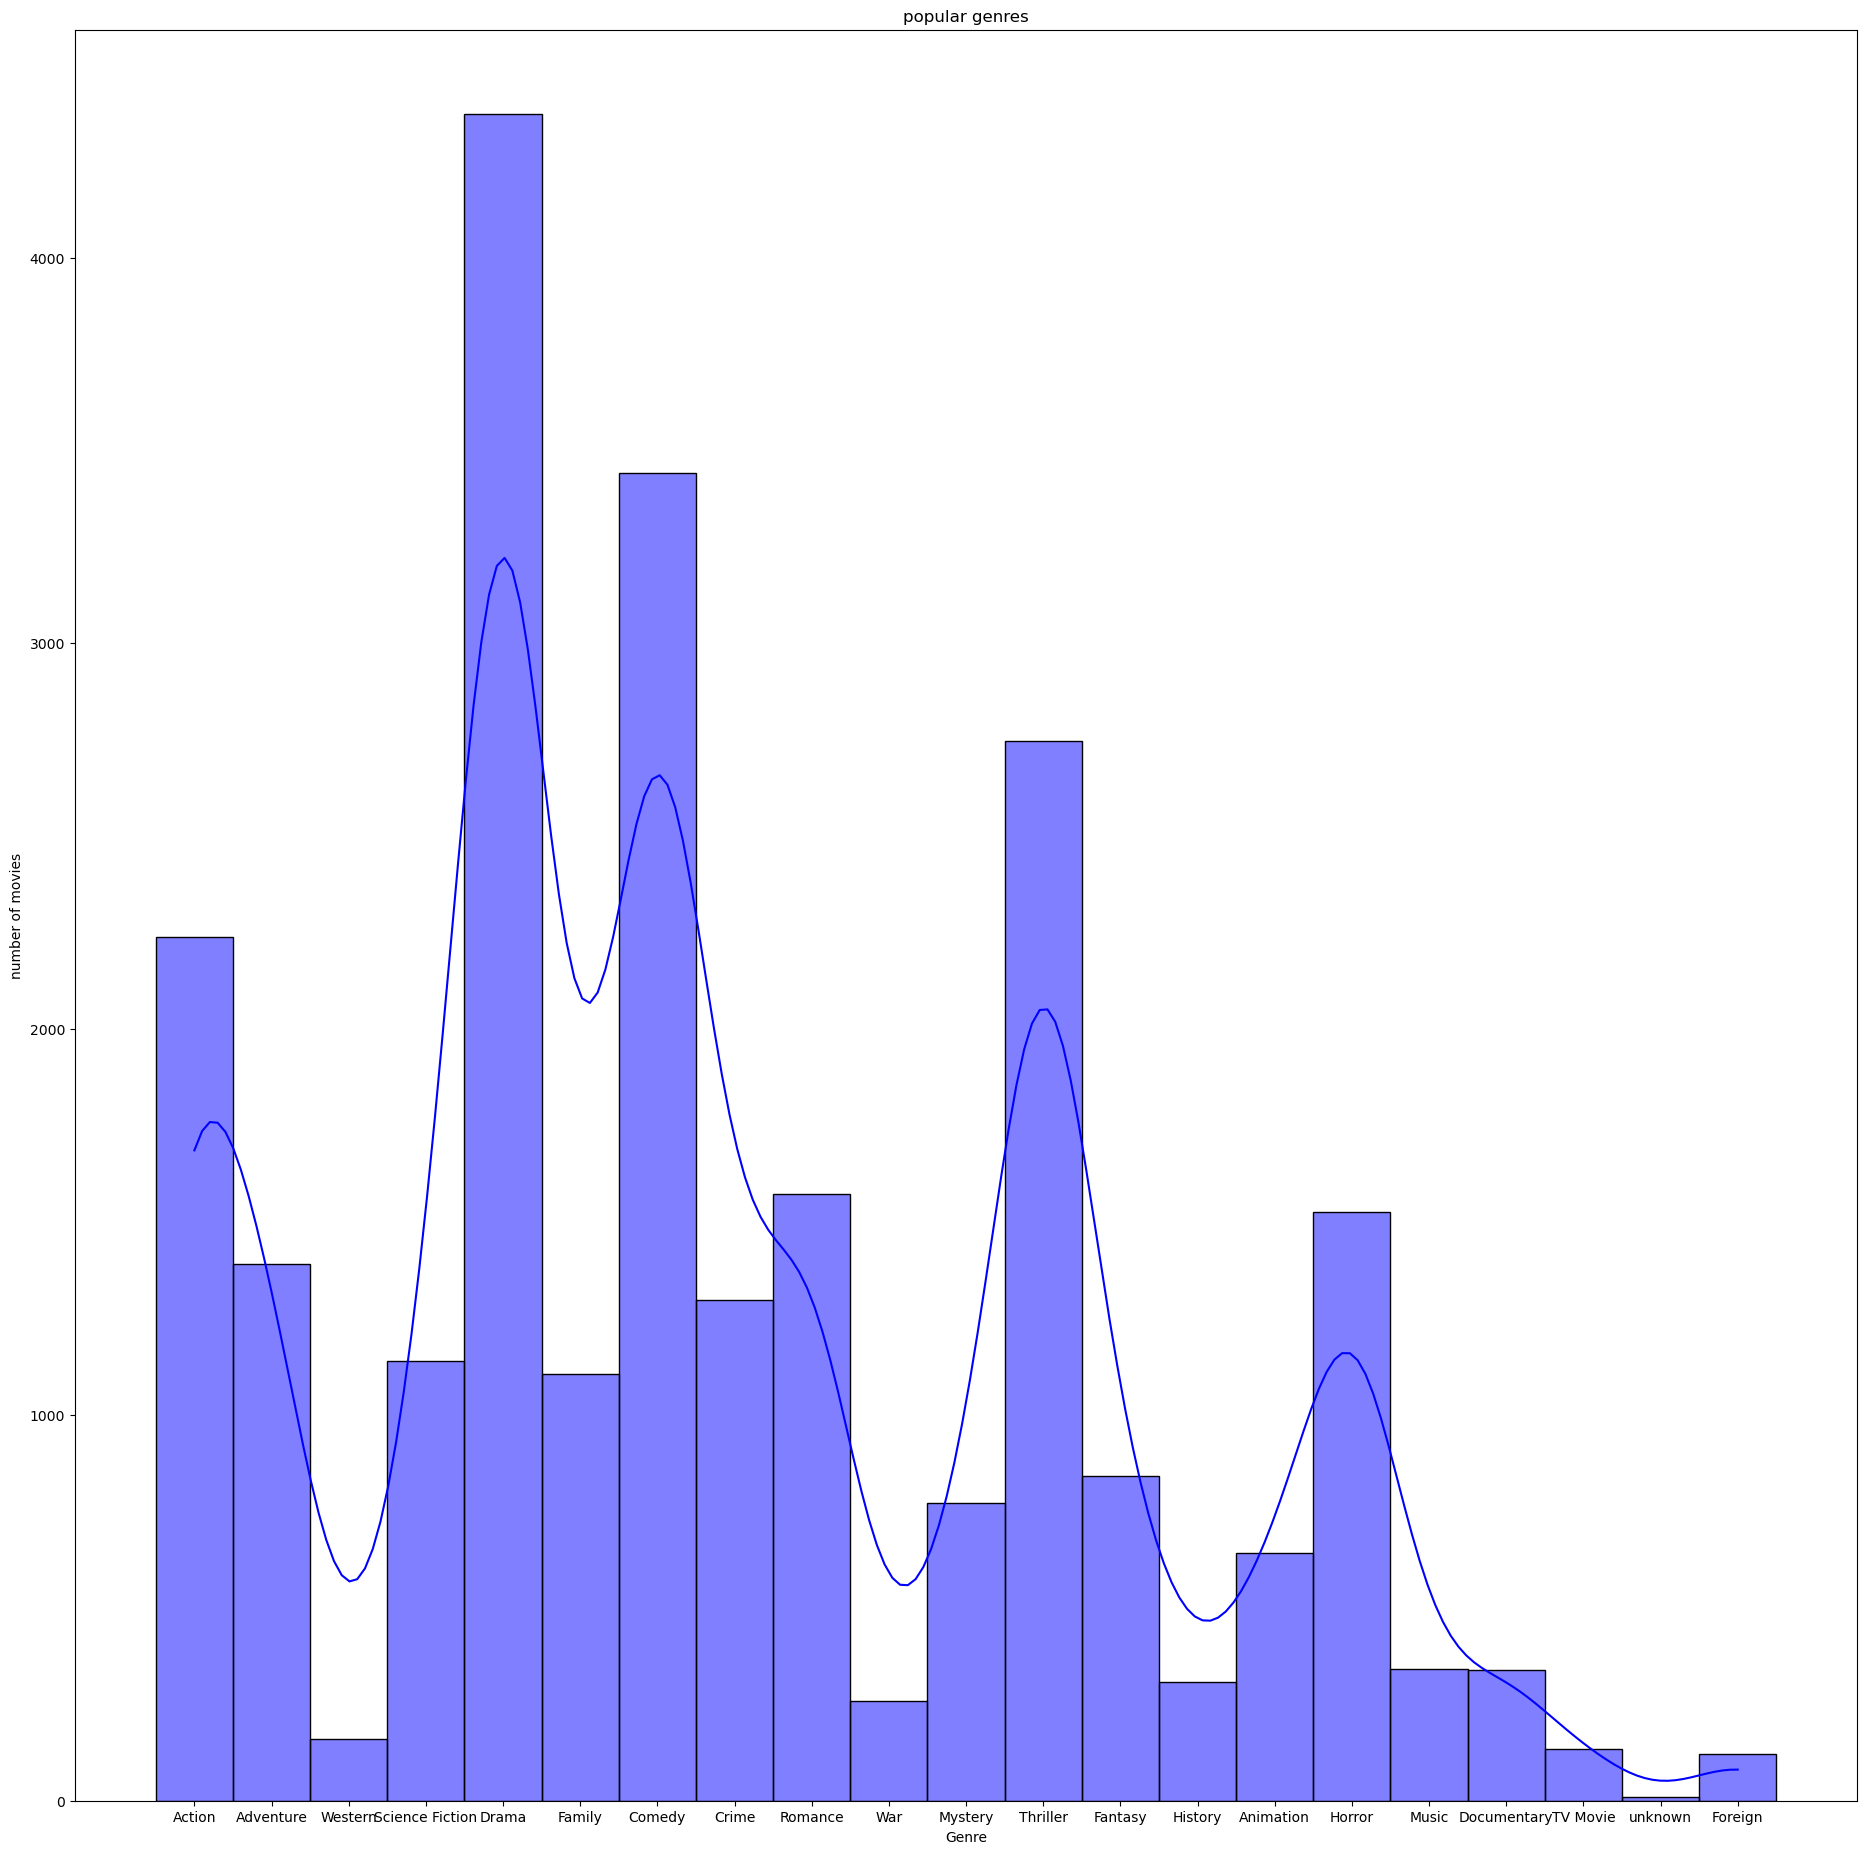

In [25]:
plt.figure(figsize=(23, 23)) # Set the figure size for better readability I know that this is so big but genres names were being mereged
sns.histplot(melted_genres.loc[melted_genres['all_genres'] != "-", 'all_genres'], kde=True, color='blue') # histplot shows the distribution
plt.title('popular genres') # Set the title of the plot
plt.xlabel('Genre') # Set the label for the x-axis
plt.ylabel('number of movies') # Set the label for the y-axis
plt.show()

### insights:
##### As we can see the most popular genre is drama and the least popular is foreign

## Research Question 5 (is there a relation between popularity and income?)

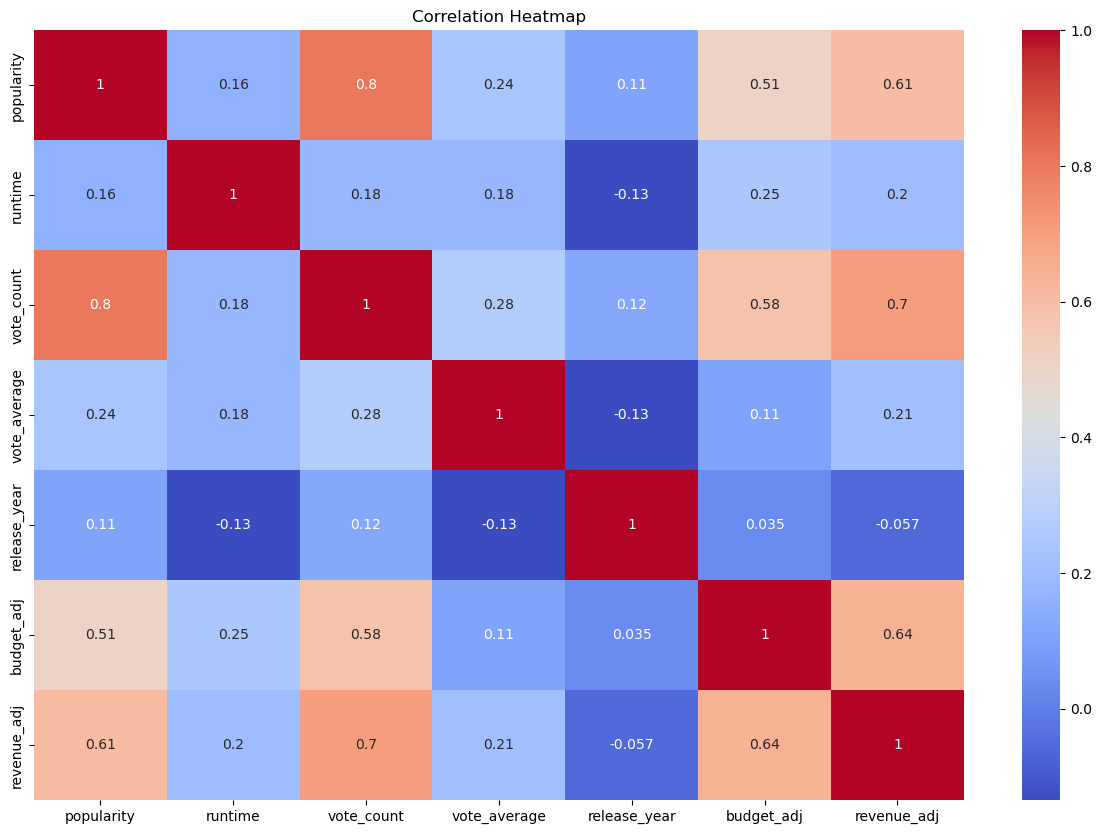

In [49]:
movies_numeric = movies.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
sns.heatmap(movies_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### insights:
##### As we can see popular movies tend to have high budgets

## Research Question 6 (who is the director who directed the highest amount of movies?)

### Additional informations
##### We are going to get the director who directed the highest amount of movies

In [28]:
director = movies["director"].mode()
freq = movies["director"].value_counts().max()
print(f"{director}directed the highest amount of movies as he has directed {freq} movies!!")

0    Woody Allen
Name: director, dtype: objectdirected the highest amount of movies as he has directed 42 movies!!


### insights:
##### The director who directed the highest amount of movies is woody allen as he has directed 42 movies!

<a id='conclusions'></a>

# Findings


### in this project we found that:
##### The director who directed the highest amount of movies is woody allen as he has directed 42 movies!
##### the popularity is affected by the budget
##### the most popular genre is drama and the least popular is foreign
##### there is no popular long movie
##### the best era for movies was from 1995 to 2007
##### there is a coreletion between the time when the movies were released and there runtime

# limitations:

##### there are many limitations such as the old data which affected the data analysis proccess 

# Websites I referred to:

##### I referred to many websites and the ones that I most needed were w3schools,reddit,deepseek and many others